<a href="https://colab.research.google.com/github/allen44/bluebook-for-bulldozers/blob/master/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End to End Multi-class Dog Breed Classification

This notebook builds and end-to-end multi-class image classifier using TenhsorFlow 2.0 and TensorFlow Hub

## 1. Problem
This model attemptst to identify the breed of the dog in a photo.

Application: I want to identify a dog breed when I photograph it with my phone.

## 2. Data

The data we're using is from Kaggles's data set


## 3. Evaluation

The identification is evaluated on Multi Class Log  Loss

## 4. Features

Some information about the data:

* We're dealing with images (unstructured data) so it's probably best that we use deep learning/transfer learning.
* There are 120 classes (because there are 120 breeds of dogs)

* There are around 10000 images in the training set (these images have labels).

* There are around 10000 images in the test set (these images have no labels).




## Get our workspace ready

* Import Tensorflow 2.x ✅
* Import Tensorflow Hub ✅
* Make sure we're using a GPU ✅

In [14]:
# Import Tensorflow into Colab
import tensorflow as tf
assert int(str(tf.__version__)[0]) > 1
print("TF version", tf.__version__)

# Import Tensorflow Hub
import tensorflow_hub as hub
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU:", tf.config.list_physical_devices('GPU'))
assert tf.config.list_physical_devices('GPU')


TF version 2.3.0
TF Hub version: 0.9.0
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Getting our data ready

As with all machine learning models, our data has to be in numerical format.

* Turn images into Tensors (kind of like a numpy array for GPUs).

Let's start by accessing our data and checking out the labels.



In [15]:
# Checkout the labels of our data 
import pandas as pd

# /content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/labels.csv
labels_csv = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     5544cad268dab34920c63985128fa0b9  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [16]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


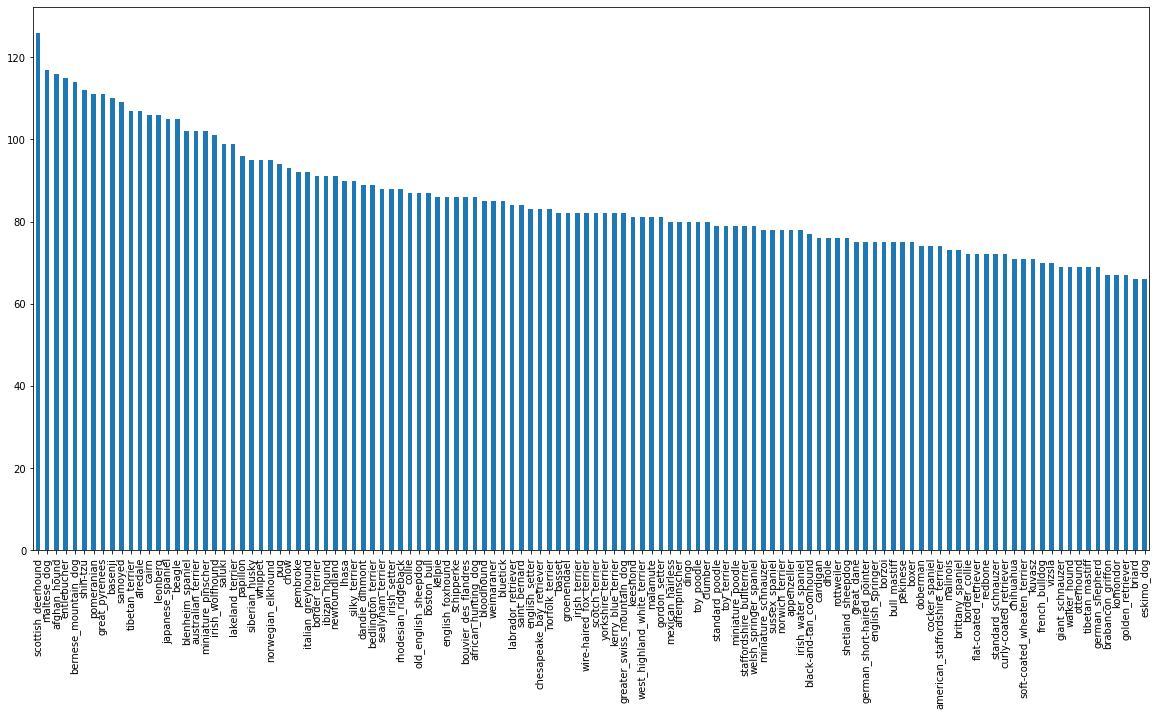

In [17]:
# How many labels are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [18]:
#70 to 85 in general

labels_csv["breed"].value_counts().median()

82.0

In [19]:
# # Let's view an image using IPython
# from IPython.display import Image
# Image("/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/000bec180eb18c7604dcecc8fe0dba07.jpg") # copy image_id from cells above

### Getting images and labels

Let's get a list of all of our image pathnames.


In [20]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [21]:
# Create pathnames from image id column
image_ids = [fname for fname in labels_csv["id"]]

# Check the first 10
image_ids[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [22]:
data_directory = "/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train"

# Create pathnames from image id column
filenames = [data_directory + '/' + id +".jpg" for id in labels_csv["id"]]

# Check the first 10
filenames[:10]

['/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identificati

In [29]:
# Compare labels_csv to number of files in our Train directory.
# We want to make sure that we're working with the same amount of data.
import os
if len(os.listdir("/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/")) == len (filenames):
  print("filesnames maatch actual amount of files!!!. Proceed.")
  print(f"len(filenames): {len(filenames)}")
else:
  print("filenames differs from actual amount of files!!! Check the target directory.")

filesnames maatch actual amount of files!!!. Proceed.
len(filenames): 10222


In [30]:
# One more check
# Image(filena/mes[9000])

In [31]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we'vve now got our training image filepatns in a list, let's prepare our labels.



In [32]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels 

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [33]:
# Does same thing as above
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels 

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [34]:
len(labels)

10222

In [35]:
# Seee if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories!")

Number of labels matches number of filenames!


In [36]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds, len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter', 'gre

In [37]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [38]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [39]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the same label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [40]:
print(labels[3])
print(boolean_labels[2].astype(int))

bluetick
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [41]:
filenames[:10]

['/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identificati

### Creating our own validation set
Kaggle didn't give us a validation set, so we'll have to create our own.

In [79]:
# Setup X and y labels
X = filenames
y = boolean_labels

len(filenames)

10222

That a lot of files. To minimize time between experiments, we'll work with only  a subset of the data and increase as needed.


In [80]:
# Set number of images to use for experimenting (about 1000)
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:100}

In [81]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], # only first 1000 filenames
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2, 
                                                  random_state=42)

# We use filesnames for X instead of images because the filenames are faster.

# Check the shape.
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [169]:
type(y_train)

list

In [172]:
type(X_train)

list

In [82]:
# Let's habe a look at the training data
X_train[:2], y_train[:2]

(['/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,

### Preprocessing images
Create some function to turn our images into Tensors.

As a theme, we are going to write functions rather than just code. This will allow us to reuse code throughout this project and other similar ones.

To preprocess our imates into Tensors, we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Normalize the image
5. Resize the image to be a shape of (224, 224)
6. Return the modified image

In [83]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape # will show the three color channels (for RGB)

(257, 350, 3)

In [84]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [85]:
image.max(), image.min()

(255, 0)

In [86]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [87]:
# Turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

The tensor looks a lot like the numpy array.

Now let's make a function to preprocess these tensors.


In [88]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file patch and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpg image to numerical Tensor with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  
  # Return a Tensor
  return image

## Tensorflow prefer the data and the label in one Tensor

### Turning our data into batches

Why turn our data into batches?

Let's say we have 10000+ images, we might run out of memory by doing them all at once.
So that's why we do about 32 at a time.

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this:

(image, label)


In [89]:
# Create a simple function to return a tuple of Tensors, (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label, 
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [90]:
# Demo of the above
(process_image(X[42]), y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Our image is already a Tensor, but our label is not yet a Tensor.

In [91]:
# Demo of the above, with the pair as Tensors
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form (image, label). Let's make a function to turn all of our data, X and y, into batches.

### Turn Tensors into batches

In [92]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# cREATE A FUNCTION TO TURN DATA INTO BATCHES
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test data set, we don't have labels
  if test_data:
    print("\nCreating test data batches...")
    #Turn all X into Tensor slices
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data = data.map(process_image)
    data_batch = data.batch(BATCH_SIZE)
    print(f"data_batch.element_spec: {data_batch.element_spec}")
    return data_batch
  
  # If the data is a validation dataset, we don't need to shuffle it.
  elif valid_data:
    print("\nCreating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    print(f"data_batch.element_spec: {data_batch.element_spec}")
    return data_batch
  
  else: # It is a training data set; we will shuffle it.
    print("\nCreating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # Create (image,, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)
    # Turn training data into batches
    data_batch = data.batch(BATCH_SIZE)
    print(f"data_batch.element_spec: {data_batch.element_spec}")
  return data_batch

In [93]:
# Create the data training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)


Creating training data batches...
data_batch.element_spec: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

Creating validation data batches...
data_batch.element_spec: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))


In [94]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

#### Sidenote: let's examine part of the create_batches() function, line-by-line, for better understanding of how it works.

For training data:

In [95]:
def create_training_data_batch(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False): 
    print("\nCreating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # Create (image,, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)
    # Turn training data into batches
    data_batch = data.batch(BATCH_SIZE)
    print(f"data_batch.element_spec: {data_batch.element_spec}")
    return data_batch

In [96]:
train = create_training_data_batch(X_train, y_train)


Creating training data batches...
data_batch.element_spec: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))


In [97]:
 # Turn filepaths and labels into Tensors
data_temp = tf.data.Dataset.from_tensor_slices((tf.constant(X_train), 
                                               tf.constant(y_train)))
data_temp

<TensorSliceDataset shapes: ((), (120,)), types: (tf.string, tf.bool)>

In [98]:
# Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
data_temp = data_temp.shuffle(buffer_size=len(X_train))
data_temp

<ShuffleDataset shapes: ((), (120,)), types: (tf.string, tf.bool)>

In [99]:
# # Create (image,, label) tuples (this also turns the image path into a preprocessed image)
# data_temp = data_temp.map(get_image_label)
# data_temp

### Visualizing data batches

Now, we've got our data in batches, but it can be a little hard to understand these without visualizing them.

In [100]:
import matplotlib.pyplot as plt

# Create a function for vireing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the fifure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displlaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

Because our data is in a batch, we need to unbatch it by turning it into an iterator

In [101]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [102]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[3.78308862e-01, 3.93995136e-01, 3.90073568e-01],
          [3.79017889e-01, 3.94704163e-01, 3.90782595e-01],
          [3.83079797e-01, 3.98766071e-01, 3.94844502e-01],
          ...,
          [9.10953760e-01, 9.10953760e-01, 9.16433513e-01],
          [9.23452616e-01, 9.23452616e-01, 9.31295753e-01],
          [9.29986060e-01, 9.29986060e-01, 9.37829196e-01]],
 
         [[3.53140593e-01, 3.68826866e-01, 3.64905298e-01],
          [3.56360793e-01, 3.72047067e-01, 3.68125498e-01],
          [3.55865687e-01, 3.71551961e-01, 3.67630392e-01],
          ...,
          [9.37653363e-01, 9.37653363e-01, 9.38509583e-01],
          [9.45001841e-01, 9.45001841e-01, 9.46227312e-01],
          [9.49396133e-01, 9.49396133e-01, 9.56840515e-01]],
 
         [[3.67533296e-01, 3.83219600e-01, 3.79298002e-01],
          [3.63559991e-01, 3.79246294e-01, 3.75324726e-01],
          [3.60593110e-01, 3.76279414e-01, 3.72357845e-01],
          ...,
          [9.49841380e-01, 9.49841380e-01, 9.4888

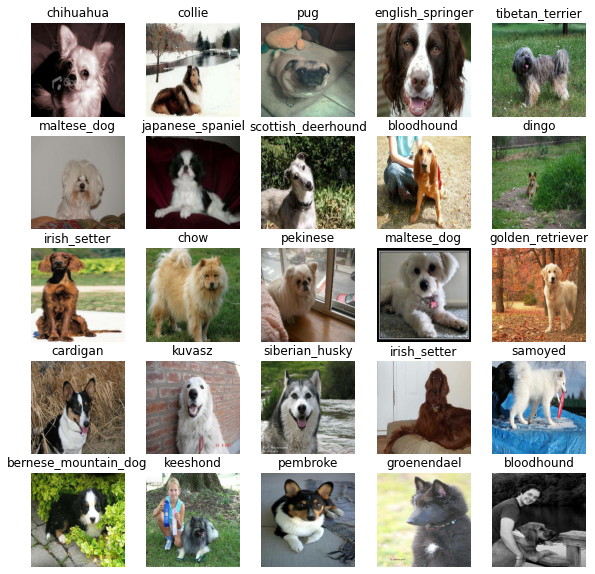

In [103]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

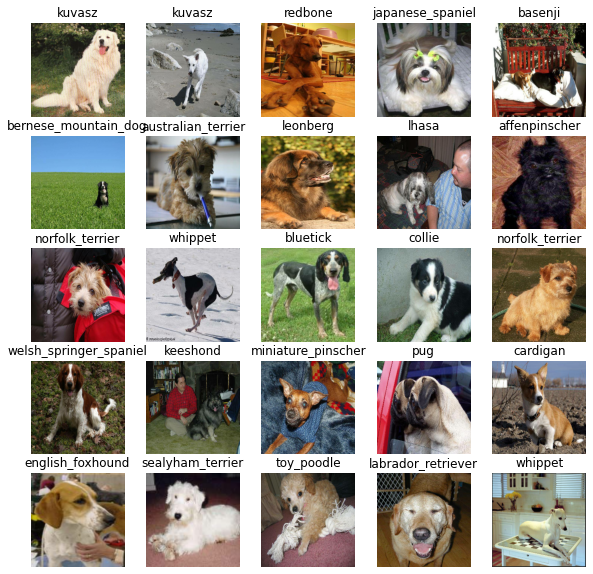

In [104]:
# Now let's visualize our validation set
val_images, val_labels = next(train_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model
One way to do this. We will use transfer learning.

Before we build a model, there are a few things we need to define:

* Input shape (our inages shape, in the form of Tensors) of our model
* Output shape (image laberls, in the form of Tensors)of our model
* URL of the model that we want to use (from TensorFlow Hub) https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [105]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # of a single image

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4" 

Now we've got our inputs, outputs and mode ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the imput shape, output shape, and the model we've chosen as parameters.
* Defines the layers in a Keras model in a sequential fasion.
* Compiles the model (says how it should be evaluated and improved).
* Builds the model( tells the model the input shape it'll be getting).
* Returns the model

All of these steps can be found here: https://www.tensorflow.org/guide/keras/sequential_model


In [106]:
# Create a function which build a Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:" , MODEL_URL)
  
  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
  )

  # Build the model  
  model.build(INPUT_SHAPE)

  return model

In [107]:
model_tmp = create_model()
model_tmp.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


##### Side note: Examining the create_model function's parts

In [108]:
 # Setup the model layers
model_tmp = tf.keras.Sequential([
  hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
  tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                        activation="softmax") # Layer 2 (output layer)
])
model_tmp

In [109]:
  # Compile the model
model_tmp.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
)

model_tmp

In [110]:
  # Build the model  
  model_tmp.build(INPUT_SHAPE)

In [111]:
outputs = np.ones(shape=(1,1,1280))

## Creating callbacks  

Callbacks are helper functions a model can use during training to do such things as save its progress or stop training early if a model stops improving.

We'll create two callbacks.
* One for TensorBoard which helps track our model progress and,
* One to stop the model from training for too long.



### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our models's fit() function.
3. Visualize our model's training logs with the %tensorboard magic function( we'll do this after model training).


In [112]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [113]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensoorBoard log files
  logdir = os.path.join("/content/drive/My Drive/Colab Notebooks/dog-breed-identification/logs",
                        # Make it so the logs get tracjed whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%M%D-%H%M%^S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback

Early stopping helps stop our model from overfitting when a certian metric stops improving. By default, it monitors validation loss. However, we will choose "accuracy".


In [114]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

[link text](https://)## Training a mode (on a subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [115]:
# One epoch is one pass over the entire training set.
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [116]:
# Check to make sure we're still running on a GPU
print("GPU:", tf.config.list_physical_devices('GPU'))
assert tf.config.list_physical_devices('GPU')

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Let's create a function which trains a model.

* Create a model using create_model()
* Setup a TensorBoard callback using create_tensorboard_callback()
* Call the fit()function on our model passing it the training data, validation data, number of epochs to train for(NUM_EPOCHS).
callbacks we'd like to use
* Return the model

In [117]:
# Build aa function to train and return a trained model
def train_model():
  """
  Trains a fiven model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create a new TensorVoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to  the data passign it the callbacks we created
  model.fit(x=train_data, 
            epochs=NUM_EPOCHS, 
            validation_data=val_data,
            validation_freq=1, # once per epoch
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
 # Fit the model to the data
model = train_model()

It looks like our model is overfitting because  it's performing far better on the training set than the validation set.

**Note:** Overfitting to begin with is a good sign; it means the model is learning.

We only trained on a small subset of the training data.

In [ ]:
model.summary()

### Checking the Tensorboard logs

The TensorBoard magic function `%tensorboard` will access the logs firectory that we creatred earlier and visualize its contents.

In [ ]:
%tensorboard --logdir /content/drive/My\ Drive/Colab\ Notebooks/dog-breed-identification/logs

## Making and evaluating predictions using a trained model


In [ ]:
# Use our trained model to make some predictions

predictions = model.predict(val_data)

In [ ]:
# Let's remind ourselves what val_data is
val_data

It's a BatchDataset with images and labels. We know the true labels, but the predict function will only look at the images to make the prediction. We can use the labels after the predict function runs, so that we can evaluate the predictions.

In [ ]:
# Use our trained model to make some predictions

predictions = model.predict(val_data, verbose=1)
predictions

Lots of really small numbers. The numbers are the probilities for each breed.

Let's transform these predicitions into something we can understand better.

In [ ]:
predictions.shape

In [ ]:
len(y_val), len(unique_breeds)


In [ ]:
np.sum(predictions[0]) #about 1, because of the softmax activator

In [ ]:
# First prediction
index = 42

print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

Having the above functionality is great, but we would like to be able to do it at scale. 

And it would be even better if we could see the image the prediction is being made on!

**Note**: prediction probabilities are also known as confidence levels.


In [147]:
# Turn the prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

NameError: ignored

In [ ]:
val_data

Since our val_data is in a batch dataset, we want to unbatch it and get a list of the images and a list of the labels to make predictions on the validation images and then compare those predictions to the labels (true labels).

In [ ]:
# Create a function to unbatch a batch dataset
images_ = []
labels_ = []

# Loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  print(image) #still in th eform of a preprocessed image
  print(label)


In [ ]:
# Create a function to unbatch a batch dataset
images_ = []
labels_ = []

# Loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]

Our goal is to visualize the image, and read the label of the prediction.

In [ ]:
get_pred_label(labels_[0])

In [ ]:
get_pred_label(predictions[0])

In [145]:
# Create a function to unbatch a batched dataset
def unbatchify(batched_dataset, la):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in batched_dataset.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(lab b

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [146]:
get_pred_label(val_labels[0])

NameError: ignored

Now we've got ways to get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visual.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels, and an array of images and an integer (for the index of each array).
* Plot the predicted label, it's predictied probability, the truth label, and the target image on a single plot.

In [203]:
def plot_pred(prediction_probabilities_array, labels_array, images_array, n=1):
  """
  View the prediction, ground tructh, and image for sample n
  """
  import matplotlib.image as mpimg

  pred_prob = prediction_probabilities_array[n]
  true_label = labels_array[n] 
  image = images_array[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  confidence = np.max(pred_prob)*100

  # Plot image & remove ticks
  try:
    # assume images_array is type np.array
    plt.imshow(image)
  except:
    #assume image_array is list of filepaths 
    plt.imshow(mpimg.imread(image))
  plt.show()
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "darkgreen"
  else:
    color = "darkred"

  # Change plot title to be predicted, probability of prediction, and truth label
  title_text = f"{pred_label}, {confidence:0.1f}%, ({true_label})"
  plt.title(title_text,
            color=color)
  # print(f"pred_label: {pred_label}, pred_prob: {np.max(pred_prob)*100}%")


  # print(f"true_label: {true_label}")

In [204]:
plot_pred(prediction_probabilities_array=predictions,
          labels_array=val_labels,
          images_array=val_images,
          n=0)


NameError: ignored

Now that we have a function to visualize our models top prediction, let's make one to visualize the top 10 predictions for each image.

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer (the index of each array)
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Predicition probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.



In [140]:
def plot_pred_conf(prediction_probabilities_array, labels_array, n=0):
  """
  Plot the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob = prediction_probabilities_array[n]
  true_label = labels_array[n]
  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  # Change color of true label
  # print(f"np.isin(true_label, top_10_pred_labels): {np.isin(true_label, top_10_pred_labels):}")
  # print(f"true_label: {true_label}")
  # print(f"top_10_pred_labels: {top_10_pred_labels}")
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else: 
    pass

   


#####  Examining the plot_pred_conf() function's parts

In [142]:
predictions[0]

NameError: ignored

In [ ]:
# Sort buy index associated with predictions in ascending order
predictions[0].argsort() 

In [ ]:
# Slice the final 10 of the list, which are the ten largest, in ascending order
predictions[0].argsort()[-10:]

In [ ]:
# Reverse the previous slice. Nowe they are in descending order (highest is first now)
predictions[0].argsort()[-10:][::-1]

In [ ]:
# Checking the element values of the same slice
predictions[0][predictions[0].argsort()[-10:][::-1]]

In [ ]:
n = 1
pred_prob = predictions[n]
true_label = val_labels[n]
top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]


# Find the top 10 prediction confidence values
top_10_pred_values = pred_prob[top_10_pred_indexes]
top_10_pred_values

In [ ]:
# Find the top 10 prediction labels
top_10_pred_labels = unique_breeds[top_10_pred_indexes]
top_10_pred_labels

In [ ]:
plot_pred_conf(prediction_probabilities_array=predictions, 
               labels_array=val_labels,
               n=2)

We've spent a bit of time making our models mor visual, because the data alone is not enough, without communication.

Now, we've got some functions to hep us visualize the model. Let's check out a few predictions and their different values.

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities_array=predictions,
            labels_array=val_labels,
            images_array=val_images,
            n=i+i_multiplier)

  plot_pred_conf(prediction_probabilities_array=predictions,
                 labels_array=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

**Challenge:** How would we create a Confusion matrix with our models predicionts and true labels.

## Saving and loading a trained model


In [123]:
# Create a function to save the model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and aappends a suffix (string)l
  """
  # Create a model directory pathname with current time
  model_dir = os.path.join("/content/drive/My Drive/Colab Notebooks/dog-breed-identification/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = model_dir + "-" + suffix + ".h5" # Save format of model
  print(f"Saving model to : {model_path}")
  model.save(model_path)
  return model_path

In [122]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Load a model from a h5 file.
  """
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model


Now we've got functions to save and load a model. Lets see if they work.


In [ ]:
# Save our model, trained on 1000 images
model_path = save_model(model, suffix="1000-images-mobilenet-Adam")

In [ ]:
# Load  a model.
# loaded_1000_image_model = load_model(model_path)
model = load_model("/content/drive/My Drive/Colab Notebooks/dog-breed-identification/models/20200916-01521600221151-1000-images-mobilenet-Adam.h5")

In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

In [ ]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

## Training a big dog model on the full data

In [ ]:
# Training data: X=image file names, y=labels associated with each file name
len(X), len(y)

In [ ]:
X[:10]

In [ ]:
len(X_train)

Our model has only trained 800 images. Let train it with the entire training set.

In [ ]:
# Create a data batch with the full data set (use our functions)
full_data = create_data_batches(X, y)
full_data

In [ ]:
# Create a model with the full data
full_model = create_model()

In [ ]:
# Create full mode callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all data, so we can't moditor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy")

**Note:** Running the cell below will take a little while (maybe up to 30  mninutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

In [ ]:
save_model(full_model, suffix="full-training-image-set-mobilenetv2-Adam")

In [124]:
loaded_full_model = load_model("/content/drive/My Drive/Colab Notebooks/dog-breed-identification/models/20200916-03001600225247-full-training-image-set-mobilenetv2-Adam.h5")
loaded_full_model

In [ ]:
%tensorboard --logdir /content/drive/My\ Drive/Colab\ Notebooks/dog-breed-identification/logs

# Making predictions on the test data set.

## Converting the test images to number (as databatches (batches of Tensors)).

Since our model has been train on images in the form of Tensor batches, we have to convert our test images to the same  format.

Luckily, we created `create_data_batches`() earlier which can take a list of filenames input and convert them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames✔
* Convert the filesnames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels).
* Make a prediction array by passing the test batches to the predict() method called on our model.

In [125]:
# Load the test image filenames
test_path = "/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)] 

In [50]:
test_path


'/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/test/'

In [54]:
test_filenames[:5]

['/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/test/ea1993074afd8a51c571bb0f733a754d.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/test/f13011a399f175d88c17d2bd1785625e.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/test/ee7bdce4ac4008b3551ca66f82712e31.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/test/f09c01de47c096fe62cd1398798c1369.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/test/ebf3e1d5583ceff0a51a8c6a750b367b.jpg']

In [52]:
len(test_filenames)

10357

In [118]:
# Convert the filesnames into test data batches
BATCH_SIZE = 32
test_data = create_data_batches(test_filenames, test_data=True)
test_data


Creating test data batches...
data_batch.element_spec: TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

**Note:** Calling predict() on our full model and passing it the test data data batch will take a long time to run (about an hour).

In [ ]:
# Make predictions on test data batch using the loaded full model (Make a predictions array)
test_predictions = loaded_full_model.predict(test_data, 
                                             verbose=1)

In [ ]:
# Save predictions to a csv file (for access later)
notebook_dir = "/content/drive/My Drive/Colab Notebooks/dog-breed-identification/"
filename = "preds-array.csv" 
np.savetxt(notebook_dir + filename, test_predictions, delimiter=",")

In [ ]:
# Load predictions *NumPy array) from csv file
import numpy as np
notebook_dir = "/content/drive/My Drive/Colab Notebooks/dog-breed-identification/"
fname = "preds_array.csv"
test_predictions = np.loadtxt(notebook_dir + fname, delimiter=",")

In [24]:
test_predictions[:10]

array([[4.85843702e-06, 8.35830249e-08, 2.26363372e-08, ...,
        8.83012685e-09, 3.18628004e-08, 1.40718694e-04],
       [2.95611063e-10, 1.57004451e-10, 1.05963349e-10, ...,
        2.31817787e-09, 5.79648655e-11, 2.01353084e-12],
       [5.62091964e-06, 1.11170939e-09, 7.35220196e-09, ...,
        3.29125953e-08, 1.13497046e-03, 2.42742249e-06],
       ...,
       [5.17503240e-09, 7.72181522e-07, 1.83827331e-09, ...,
        7.80582496e-08, 9.21970150e-06, 9.44737266e-08],
       [3.12183013e-09, 3.74099294e-08, 1.57196919e-05, ...,
        6.41898252e-03, 3.32602917e-10, 5.02570003e-08],
       [8.26787250e-11, 6.88662067e-06, 7.72479396e-08, ...,
        1.34040050e-08, 3.65792374e-08, 2.56525094e-08]])

In [25]:
test_predictions.shape

(10357, 120)

## Preparing the dataset for Kaggle

Looking at the Kaggle sample submission, we see that it wants our model's prediction probability outputs in a DataFrame with an ID and column from each different dog breed.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To  get the data into this format, we'll:
* Create a Pandas DataFrame with an ID column as well as a column for wach dog breed ✔
* Add datat to the ID column by extracting the tet image ID's from their file paths
* Add data * the predicition probabilities) to each of the dog breed columns.
* Exportthe DataFrame as a CSV to subit it to Kaggle.



In [60]:
# Create a Pandas DataFrame
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [61]:
test_filenames[:5]

['/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/test/ea1993074afd8a51c571bb0f733a754d.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/test/f13011a399f175d88c17d2bd1785625e.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/test/ee7bdce4ac4008b3551ca66f82712e31.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/test/f09c01de47c096fe62cd1398798c1369.jpg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/test/ebf3e1d5583ceff0a51a8c6a750b367b.jpg']

In [62]:
#Append test image IDs to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids[:10]

['ea1993074afd8a51c571bb0f733a754d',
 'f13011a399f175d88c17d2bd1785625e',
 'ee7bdce4ac4008b3551ca66f82712e31',
 'f09c01de47c096fe62cd1398798c1369',
 'ebf3e1d5583ceff0a51a8c6a750b367b',
 'e93dde9e36ff6a41cd0e72fb01703be6',
 'efb4e5dc776a639a140b022cf0835eb5',
 'ea6d2d4271393459e70d77e1026737b5',
 'e85291fc6ba44e39defc7769fa020646',
 'ee457ce7dc7f426aa7704b9864960528']

In [63]:
preds_df["id"] = test_ids
preds_df.head()


,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,ea1993074afd8a51c571bb0f733a754d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f13011a399f175d88c17d2bd1785625e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ee7bdce4ac4008b3551ca66f82712e31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f09c01de47c096fe62cd1398798c1369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ebf3e1d5583ceff0a51a8c6a750b367b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Add the prediction probabilities to preds_df
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,ea1993074afd8a51c571bb0f733a754d,4.85844e-06,8.3583e-08,2.26363e-08,1.41066e-10,5.16768e-10,4.92923e-09,8.36394e-05,1.20265e-07,1.46143e-09,1.93554e-08,8.53313e-08,1.9639e-09,3.84635e-10,2.0286e-09,1.02053e-10,3.90292e-07,9.17607e-09,6.79784e-07,5.70678e-10,1.64944e-08,1.64632e-08,9.80081e-10,1.66925e-07,1.13371e-09,9.48193e-09,4.91061e-10,8.92136e-08,2.37096e-10,5.16175e-10,3.57511e-08,7.60715e-11,3.71061e-10,6.9304e-09,6.87154e-10,3.68411e-08,2.9852e-06,3.37202e-12,1.99841e-11,1.30136e-08,...,2.77383e-08,2.04547e-10,1.3785e-09,9.52994e-09,2.61745e-08,2.69632e-08,5.88162e-10,1.65158e-10,2.51969e-08,6.69339e-08,7.10158e-10,1.19594e-09,9.84436e-10,8.49885e-09,7.19821e-12,2.13858e-08,9.33927e-10,1.85943e-07,7.0025e-07,3.28197e-10,1.16874e-05,3.36711e-10,1.54741e-08,1.11826e-07,4.83366e-08,1.37082e-10,2.73975e-05,3.46414e-09,6.00106e-08,2.29999e-05,6.21055e-08,6.59582e-06,1.46647e-10,4.09146e-10,7.0471e-08,6.49795e-08,1.71919e-07,8.83013e-09,3.18628e-08,0.000140719
1,f13011a399f175d88c17d2bd1785625e,2.95611e-10,1.57004e-10,1.05963e-10,1.90074e-09,4.72983e-08,3.66794e-11,1.43097e-11,3.19767e-13,1.09447e-11,2.80674e-12,8.48783e-12,6.89224e-13,1.89317e-11,1.19165e-10,5.52734e-08,1.28977e-10,1.3833e-11,5.02506e-09,3.4047e-13,2.16708e-10,1.45505e-07,1.75901e-05,3.19123e-08,9.14913e-09,1.92712e-12,0.999956,2.5349e-11,4.28225e-13,4.74861e-07,9.93119e-13,4.32539e-09,3.42075e-06,6.99738e-12,1.10278e-11,4.82794e-12,1.12908e-10,7.1193e-13,2.66531e-08,4.87582e-11,...,1.60337e-10,3.68115e-12,5.42639e-12,5.737e-08,3.45118e-10,1.18929e-10,3.43806e-14,2.07457e-10,3.59427e-06,2.43709e-11,3.60147e-07,9.09414e-07,3.63925e-07,1.1738e-11,1.58567e-12,4.04268e-12,3.38751e-12,2.11935e-12,1.20179e-07,8.01579e-11,1.43056e-10,5.41654e-11,1.69493e-08,1.74583e-10,1.50622e-06,6.41221e-11,4.07087e-10,6.79232e-10,1.18502e-08,8.83311e-08,1.63349e-12,2.01591e-12,1.13141e-10,3.49257e-12,1.00616e-09,1.51407e-12,5.17186e-15,2.31818e-09,5.79649e-11,2.01353e-12
2,ee7bdce4ac4008b3551ca66f82712e31,5.62092e-06,1.11171e-09,7.3522e-09,6.76763e-11,4.26858e-07,7.90789e-11,3.54201e-08,9.90288e-08,1.05179e-06,5.38357e-09,1.13993e-10,2.27644e-07,8.3378e-07,3.50117e-08,3.34914e-10,2.7586e-09,1.92572e-07,2.34755e-09,2.1614e-07,2.08263e-08,4.97394e-09,1.14968e-07,2.80326e-07,5.10883e-07,7.52845e-10,5.76342e-08,0.000141966,2.3087e-06,3.8343e-09,1.40456e-07,5.46629e-09,1.26127e-08,2.68816e-08,5.02775e-09,1.0645e-09,3.36347e-07,9.99597e-09,5.79864e-08,1.32373e-08,...,9.72152e-10,5.96238e-08,3.30332e-08,1.29522e-07,1.71083e-06,5.33277e-08,1.91191e-08,5.36708e-08,3.41901e-07,4.21088e-09,2.34515e-08,3.56295e-10,1.43747e-10,5.65098e-10,2.01365e-07,1.08643e-08,1.39255e-05,4.20369e-07,3.66523e-06,8.52446e-08,1.67204e-06,4.82827e-07,3.95128e-06,7.06681e-06,9.30734e-06,3.27403e-09,4.7682e-07,9.52851e-10,1.24197e-10,1.3286e-05,6.4041e-09,2.15196e-06,9.83987e-09,8.76662e-07,3.42667e-10,2.92343e-09,0.9978

In [68]:
fname = "full_model_predictions_submission_1_mobilenetV2.csv"
preds_df_filename = notebook_dir + fname
preds_df.to_csv(preds_df_filename, index=False)

## Making predictions on our custom images

To make predictions on custom images, we'll:

* Get the filepaths of our images.
* Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the test_data parameter to `True`.
* Pass the custim image data batch to our models `predict()` method.
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images.

In [135]:
# Get the custom image filepaths
custom_folder = "data/sara/"
custom_image_paths = [notebook_dir + custom_folder + fname for fname in os.listdir(notebook_dir + custom_folder)]
custom_image_paths[:5]

['/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/sara/2020-09-12.jpeg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/sara/2020-09-12 (1).jpeg',
 '/content/drive/My Drive/Colab Notebooks/dog-breed-identification/data/sara/2020-09-12 (2).jpeg']

In [156]:
# Setup custom data labels
custom_images_labels = ['golden_retriever', 'golden_retriever', 'golden_retriever']

In [190]:
# Turn custom images into data batchs
custom_data = create_data_batches(X=custom_image_paths,
                                  y=custom_images_labels,
                                  valid_data=True)
custom_data


Creating validation data batches...
data_batch.element_spec: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))


<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.string)>

In [191]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)
custom_preds.shape

(3, 120)

In [192]:
custom_preds

array([[5.93094364e-06, 3.66326967e-05, 3.15199664e-04, 4.12221052e-05,
        4.03865306e-05, 2.78312598e-07, 1.75183741e-05, 2.31886734e-05,
        1.63804783e-04, 5.66195013e-07, 2.55020596e-02, 1.21307921e-05,
        2.45488377e-06, 2.53711951e-05, 1.82945456e-03, 9.98886733e-08,
        8.95775997e-07, 4.51575848e-04, 1.12786392e-06, 1.39263776e-07,
        4.77939011e-07, 5.87089278e-04, 8.65077163e-06, 4.80521230e-05,
        1.48607043e-07, 2.32962208e-07, 1.15804504e-07, 3.51784684e-06,
        7.30362982e-02, 1.52121652e-06, 7.68033445e-01, 3.66151289e-05,
        1.24966100e-04, 1.48217305e-06, 6.05793332e-07, 2.76225251e-07,
        4.11215478e-05, 2.92466866e-05, 1.91301820e-06, 6.02236355e-07,
        7.36729930e-07, 3.10915902e-06, 2.79958567e-05, 2.00593239e-03,
        2.02757128e-05, 1.63606092e-05, 9.58241571e-07, 9.68544441e-07,
        2.86845193e-06, 6.15838431e-02, 5.93466393e-04, 3.80498241e-04,
        1.01145879e-05, 7.62478812e-05, 1.39336589e-05, 1.931982

In [193]:
# Get custom image pred labels

custom_preds_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_preds_labels

['chow', 'german_shepherd', 'chesapeake_bay_retriever']

In [185]:
# # Get custom images
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)
(custom_images)

[(array([[[0.67185974, 0.3738205 , 0.17774208],
          [0.68300074, 0.38103995, 0.17711835],
          [0.6951243 , 0.3780884 , 0.2014141 ],
          ...,
          [0.79218084, 0.62355334, 0.6000239 ],
          [0.79208905, 0.6227745 , 0.59566706],
          [0.7885788 , 0.6272912 , 0.6037618 ]],
  
         [[0.67031276, 0.3644304 , 0.18403824],
          [0.66153204, 0.3517281 , 0.18310067],
          [0.6565198 , 0.3624021 , 0.19769624],
          ...,
          [0.80245954, 0.631507  , 0.6052185 ],
          [0.80291206, 0.61220825, 0.60559934],
          [0.80344224, 0.6127384 , 0.61397266]],
  
         [[0.64538455, 0.3512669 , 0.186561  ],
          [0.65104884, 0.35693118, 0.19222529],
          [0.64873075, 0.3428484 , 0.19382878],
          ...,
          [0.8077237 , 0.63125306, 0.6116452 ],
          [0.79215693, 0.6177434 , 0.60597867],
          [0.79455525, 0.61416304, 0.6182772 ]],
  
         ...,
  
         [[0.6693228 , 0.6776655 , 0.56919366],
          [0.7

TypeError: ignored

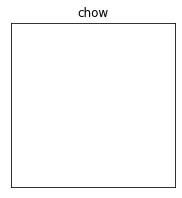

In [184]:
# Check custom predictions
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_labels[i])
  plt.imshow(image)

AttributeError: ignored

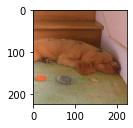

In [166]:
# Now let's visualize our validation set
custom_images, custom_labels = next(custom_data.as_numpy_iterator())
show_25_images(custom_images, custom_labels)

In [170]:
type(custom_preds)

numpy.ndarray

In [171]:
type(custom_preds_labels)

list

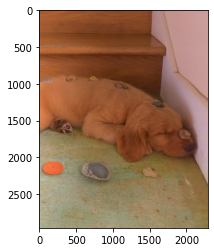

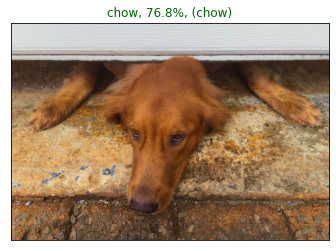

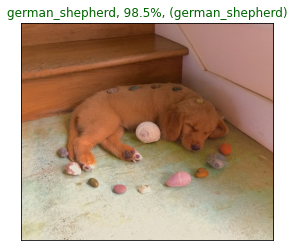

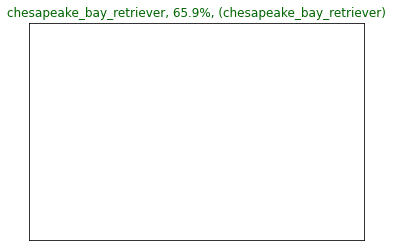

In [210]:
for i in range(len(custom_images)):
  plot_pred(custom_preds, custom_preds_labels, custom_image_paths, n=i)

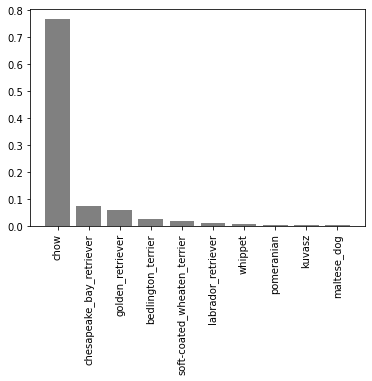

In [211]:
plot_pred_conf(custom_preds, unique_breeds)